In [1]:
import numpy as np
import pandas as pd
import csv

from selenium import webdriver
import chromedriver_autoinstaller

from tqdm import tqdm, tqdm_notebook
from tqdm.notebook import tqdm
import re
from time import sleep
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
title="리뷰","평점"

In [3]:
f=open("musinsa_re.csv","w",encoding='utf-8-sig',newline="")

In [4]:
writer=csv.writer(f)
writer.writerow(title)

7

In [5]:
chrome_path=chromedriver_autoinstaller.install()
driver = webdriver.Chrome(chrome_path)
time.sleep(3)
driver.get("https://www.musinsa.com/app/reviews/lists")

In [5]:
text=input("감성분석리뷰사이트: ")

감성분석리뷰사이트: 무신사


In [21]:
driver.find_element_by_xpath('//*[@id="main_pack"]/section[1]/div/div/div[1]/div/div[2]/a').click()
driver.implicitly_wait(10)

In [22]:
driver.execute_script("return document.body.scrollHeight")
driver.implicitly_wait(10)

In [37]:
driver.find_element_by_css_selector(".review-contents .review-contents__text")


<selenium.webdriver.remote.webelement.WebElement (session="e8d0455420e9af3e603da8bc0733ef6e", element="77fc5252-0619-4a06-a6b8-f1c3004a6fca")>

In [ ]:
/html/body/div[3]/div[3]/div[4]/div/div[3]/div[19]/div[4]/div[1]

In [ ]:
/html/body/div[3]/div[3]/div[4]/div/div[3]/div[20]/div[4]/div[1]

In [35]:
driver.find_element_by_xpath("/html/body/div[3]/div[3]/div[4]/div/div[3]/div[19]/div[3]/span/span/span").get_attribute('style')

'width: 100%;'

In [ ]:
/html/body/div[3]/div[3]/div[4]/div/div[3]/div[18]/div[3]/span/span/span

In [ ]:
/html/body/div[3]/div[3]/div[4]/div/div[3]/div[1]/div[3]/span/span/span

In [36]:
driver.find_element_by_xpath("/html/body/div[3]/div[3]/div[4]/div/div[3]/div[19]/div[3]/span/span/span").get_attribute('style')

'width: 80%;'

In [ ]:
/html/body/div[3]/div[3]/div[4]/div/div[3]/div[20]/div[3]/span/span/span

In [7]:
import random
t=random.choice([3,4,5])

In [20]:
element=driver.find_element_by_css_selector("#query.input_text")
driver.implicitly_wait(10)
element.send_keys(text)
driver.find_element_by_css_selector(".btn_submit").click() #element.submit()
time.sleep(2)

In [10]:
driver.find_element_by_xpath(f'/html/body/div[3]/div[3]/div[4]/div/div[3]/div[1]/div[4]/div[1]').text

'핏도 딱 좋고 색이예뻐용 다른색도 있으면 좋겠습니다앙'

In [13]:
out_re=[]
c = 0
k=2
while c != 40:
    c+=1
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    driver.implicitly_wait(t)
    for j in tqdm(range(1,21)):
        time.sleep(2)
        review=[driver.find_element_by_xpath(f'/html/body/div[3]/div[3]/div[4]/div/div[3]/div[{j}]/div[4]/div[1]').text
               ,driver.find_element_by_xpath(f"/html/body/div[3]/div[3]/div[4]/div/div[3]/div[{j}]/div[3]/span/span/span").get_attribute('style')
               ]
        time.sleep(t)
        out_re.append(review)
    k+=1
    driver.implicitly_wait(t)
    print(out_re)
    try:
        if k < 12:
            driver.find_element_by_xpath(f'/html/body/div[3]/div[3]/div[4]/div/div[3]/div[21]/div[2]/div/a[{k}]').click()
            driver.implicitly_wait(t)
        else:
            driver.find_element_by_xpath(f'/html/body/div[3]/div[3]/div[4]/div/div[3]/div[21]/div[2]/div/a[{k}]').click()
            k=1
            driver.implicitly_wait(t)
    except:
        continue



  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

  0%|          | 0/20 [00:00<?, ?it/s]

[['색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특히 만족요.', 'width: 100%;'], ['시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.', 'width: 100%;'], ['진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요', 'width: 100%;'], ['기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['사이즈가 딱 적당하고 두께도 적당해 편하게 입고 다니기에 좋았다.', 'width: 100%;'], ['타비 슈즈를 신는다면 무조건!\n신고 세탁 후 사진인데 모양 변형도 거의 없고 좋습니다', 'width: 100%;'], ['챙이 길어서 얼굴이 작아보이는 느낌이 드는 모자였습나다', 'width: 100%;'], ['굉장히 큽니다. 제 생각에 100kg 나가도 xl맞을듯\n제 신체사이즈는 L입으시면 될 듯합니다.\n핏은 굉장히 좋고 색감도 좋고 두께도 어느정도 있어 건포도도 안보입니다 굳', 'width: 100%;'], ['데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요', 'width: 100%;'], ['생각보다 괜찮아요 다맘 아래쪽 시보레가 좀 강합니다', 'width: 100%;'], ['여행다닐때 나일론 모자 구겨넣고 떠나면 제일 편하죠', 'width: 80%;'], ['디자인예뻐요사이즈도 잘 맞고\n오래입을거 같습니다', 'width: 100%;'], ['얇은데 체형보완도 잘되고 목이 깊게 안파여서 부담스럽지도 않고 맨살에다 입어도 안까슬거려서 좋아요. 가성비 좋은듯', 'width: 100%;'], ['한 칫수 크게입으세요~~오버핏이 이쁘네용\n두께감도 최고', 'width: 100%;'], ['두개 살 걸 그랬어요 너무 잘 입고 있습니다! 길이도적당히 크롭이라 더 좋아요', 'widt

In [14]:
writer.writerows(out_re)

In [15]:
f.close()

In [54]:
df=pd.read_csv('musinsa_re.csv')
df

,리뷰,평점
0,색상 디자인 다 좋아요. 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 ...,width: 100%;
1,시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요.,width: 100%;
2,진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요,width: 100%;
3,기본템으로 가지고 있기 딱 좋아요! 사이즈도 맞고 캡도 적당해요,width: 100%;
4,데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요,width: 100%;
...,...,...
795,100원에 반팔 개꿀 무조건 사야합니다\n진짜 후회안함,width: 100%;
796,소재 기장 다 너무 맘에듭니다.\n나중에 할인 뜨면 더사고싶네요,width: 100%;
797,다 좋은데 입을 ㄸ..입을 때 힘들어요 다 입으면 편한데ㅜㅜ 하지만 이쁘니 만족합니다,width: 80%;
798,인생 첫 와이드팬츠인데 통이 너무 클까 걱정했는데\n과하지않고 딱 보기좋은 통이어서...,width: 100%;


In [17]:
!python -V 

Python 3.9.7


In [55]:
df['리뷰'].nunique()

665

In [56]:
df['평점'].nunique()

4

중복데이터 제거

In [57]:
df.drop_duplicates(subset=['리뷰'], inplace=True)

공백확인

In [58]:
df.isna().sum()

리뷰    0
평점    0
dtype: int64

In [59]:
df['리뷰']=df.리뷰.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') 
df['리뷰']=df.리뷰.str.replace('^ +','')

In [25]:
df

,리뷰,평점
0,색상 디자인 다 좋아요 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특...,width: 100%;
1,시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요,width: 100%;
2,진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요,width: 100%;
3,기본템으로 가지고 있기 딱 좋아요 사이즈도 맞고 캡도 적당해요,width: 100%;
4,데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요,width: 100%;
...,...,...
793,오버 한게 핏도 이쁘고 아주 마음에 듭니다마음에 딱드네영,width: 100%;
794,두께도 적당하고 핏도 괜챃습니다 색깔도 이쁩니다,width: 100%;
795,원에 반팔 개꿀 무조건 사야합니다진짜 후회안함,width: 100%;
796,소재 기장 다 너무 맘에듭니다나중에 할인 뜨면 더사고싶네요,width: 100%;


평점 분류 처리

In [60]:
df['평점']=df.평점.str.replace('[^0-9]','') 

In [61]:
l=[]
for i in df['평점']:
    df_i=int(i) / 20
    if df_i != 5 :
        df_i = 0
    else:
        df_i = 1
    l.append(df_i)
df['평점']=l

In [31]:
df

,리뷰,평점
0,색상 디자인 다 좋아요 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특...,5.0
1,시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요,5.0
2,진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요,5.0
3,기본템으로 가지고 있기 딱 좋아요 사이즈도 맞고 캡도 적당해요,5.0
4,데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요,5.0
...,...,...
793,오버 한게 핏도 이쁘고 아주 마음에 듭니다마음에 딱드네영,5.0
794,두께도 적당하고 핏도 괜챃습니다 색깔도 이쁩니다,5.0
795,원에 반팔 개꿀 무조건 사야합니다진짜 후회안함,5.0
796,소재 기장 다 너무 맘에듭니다나중에 할인 뜨면 더사고싶네요,5.0


In [62]:
df

,리뷰,평점
0,색상 디자인 다 좋아요 바지 색상 관계없이 잘 어울리고 세탁 후에도 변형되지않아 특...,1
1,시원한 재질이라 여름에 입어도 다른티 보단 시원할 것 같아요,1
2,진짜진짜 너무 예뻐요 반팔카라 처음사보는데 좋네요,1
3,기본템으로 가지고 있기 딱 좋아요 사이즈도 맞고 캡도 적당해요,1
4,데님셔츠 하나 사고싶었는데 잘 산 것 같고 약간 두께감이있어서 더 좋네요,1
...,...,...
793,오버 한게 핏도 이쁘고 아주 마음에 듭니다마음에 딱드네영,1
794,두께도 적당하고 핏도 괜챃습니다 색깔도 이쁩니다,1
795,원에 반팔 개꿀 무조건 사야합니다진짜 후회안함,1
796,소재 기장 다 너무 맘에듭니다나중에 할인 뜨면 더사고싶네요,1


In [63]:
df.describe()

,평점
count,665.000000
mean,0.849624
std,0.357709
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [40]:
s_w=['은','는','이','가','를','들','에게','의','를','도','으로','만','라서','한다','함','네','이래','하게','한','어','요','에','을','에서','이다','다']

In [41]:
from wordcloud import WordCloud,STOPWORDS 

In [43]:
# wc=WordCloud(font_path='malgun',max_words=2000).generate(' '.join(df[df.평점==0].리뷰))
# plt.imshow(wc)

In [44]:
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

훈련 데이터와 테스트 데이터 분리하기 3:1

<AxesSubplot:>

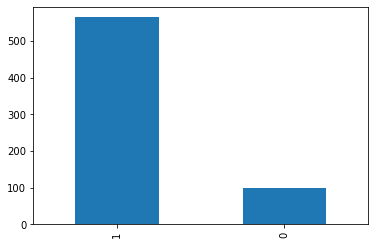

In [65]:
df['평점'].value_counts().plot(kind = 'bar')

In [64]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 498
테스트용 리뷰의 개수 : 167


In [93]:
m2 = Sequential()
m2.add(Embedding(vocab_size, 30))
m2.add(Bidirectional(LSTM(128))) # Bidirectional LSTM을 사용
m2.add(Dense(1, activation='sigmoid'))
m2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
hy=m2.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/20
13/13 [==============================] - 4s 109ms/step - loss: 0.5771 - acc: 0.8266 - val_loss: 0.3575 - val_acc: 0.9300

Epoch 00001: val_acc did not improve from 0.93000
Epoch 2/20
13/13 [==============================] - 1s 63ms/step - loss: 0.4846 - acc: 0.8241 - val_loss: 0.2867 - val_acc: 0.9300

Epoch 00002: val_acc did not improve from 0.93000
Epoch 3/20
13/13 [==============================] - 1s 59ms/step - loss: 0.4685 - acc: 0.8241 - val_loss: 0.3164 - val_acc: 0.9300

Epoch 00003: val_acc did not improve from 0.93000
Epoch 4/20
13/13 [==============================] - 1s 59ms/step - loss: 0.4504 - acc: 0.8241 - val_loss: 0.2898 - val_acc: 0.9300

Epoch 00004: val_acc did not improve from 0.93000
Epoch 5/20
13/13 [==============================] - 1s 61ms/step - loss: 0.4242 - acc: 0.8241 - val_loss: 0.2578 - val_acc: 0.9300

Epoch 00005: val_acc did not improve from 0.93000
Epoch 6/20
13/13 [==============================] - 1s 57ms/step - loss: 0.3712 - acc: 0.

In [89]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [88]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [87]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [86]:
max_len = 68
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 68 이하인 샘플의 비율: 99.79919678714859


In [85]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

리뷰의 최대 길이 : 107
리뷰의 평균 길이 : 16.399598393574298


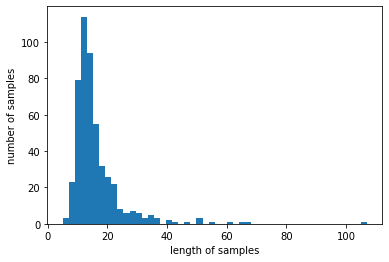

In [84]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
print(X_test[:3])

[[631, 61, 10, 50, 12, 55, 88, 95, 10, 5, 344], [131, 151, 61, 512, 11, 124, 81, 48, 1, 24, 12], [1, 123, 291, 105, 104, 2, 154, 3, 1, 441, 326, 25, 5, 103, 83, 54, 1, 23, 39, 105, 313, 17, 131, 78, 362, 110, 79, 1, 4, 1, 1, 23, 5, 112, 1, 208, 1, 483, 463, 28, 7, 1, 49, 271, 44, 108, 1, 4, 2, 36, 26, 25, 3, 20, 8, 6, 193, 1, 245, 58, 437, 83, 54, 362, 110, 79]]


In [79]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [80]:
print(X_train[:3])

[[7, 252, 2, 31, 217, 158, 102, 16, 7, 3, 66, 192], [119, 103, 469, 29, 44, 3, 2, 1, 104, 90, 76, 11, 193], [1, 218, 113, 42, 19, 32, 253, 24, 51, 470, 291, 105, 104, 90, 7, 194, 30, 24, 12]]


In [78]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 687


In [77]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1494
등장 빈도가 1번 이하인 희귀 단어의 수: 809
단어 집합에서 희귀 단어의 비율: 54.14993306559571
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.905718133953716


In [76]:
tokenizer.word_counts

OrderedDict([('너무', 128),
             ('부드럽', 5),
             ('고', 329),
             ('이쁘', 41),
             ('구요', 6),
             ('포인트', 9),
             ('되', 15),
             ('기', 81),
             ('좋', 292),
             ('옷', 24),
             ('예요', 7),
             ('깔끔', 13),
             ('기본', 15),
             ('아이템', 2),
             ('입니다', 44),
             ('재질', 31),
             ('입혀', 1),
             ('보', 15),
             ('니', 17),
             ('예쁘', 21),
             ('네요', 101),
             ('ㅎ', 7),
             ('온라인', 1),
             ('모자', 6),
             ('처음', 14),
             ('사', 33),
             ('거', 64),
             ('라', 41),
             ('걱정', 5),
             ('했', 55),
             ('지만', 29),
             ('막상', 2),
             ('착용', 4),
             ('해', 15),
             ('이뻐서', 7),
             ('만족', 44),
             ('습니다', 101),
             ('목', 8),
             ('부분', 10),
             ('사진', 12),
             ('과

In [75]:
tokenizer.word_index

{'고': 1,
 '좋': 2,
 '하': 3,
 '입': 4,
 '아요': 5,
 '너무': 6,
 '같': 7,
 '게': 8,
 '잘': 9,
 '네요': 10,
 '습니다': 11,
 '사이즈': 12,
 '어요': 13,
 '있': 14,
 '기': 15,
 '는데': 16,
 '핏': 17,
 '거': 18,
 '것': 19,
 '딱': 20,
 '합니다': 21,
 '로': 22,
 '했': 23,
 '여름': 24,
 '해서': 25,
 '지': 26,
 '보다': 27,
 '입니다': 28,
 '만족': 29,
 '이쁘': 30,
 '라': 31,
 '맘': 32,
 '생각': 33,
 '않': 34,
 '시원': 35,
 '아서': 36,
 '좀': 37,
 '구매': 38,
 '맞': 39,
 '아': 40,
 '사': 41,
 '면': 42,
 '재질': 43,
 '색감': 44,
 '안': 45,
 '수': 46,
 '어서': 47,
 '해요': 48,
 '샀': 49,
 '지만': 50,
 '편하': 51,
 '얇': 52,
 '티': 53,
 '디자인': 54,
 '긴': 55,
 '감': 56,
 '신': 57,
 '듯': 58,
 '색상': 59,
 '바지': 60,
 '할': 61,
 '때': 62,
 '더': 63,
 '두께': 64,
 '옷': 65,
 '조금': 66,
 '아주': 67,
 '없': 68,
 '았': 69,
 '괜찮': 70,
 '이뻐요': 71,
 '가격': 72,
 '적당': 73,
 '느낌': 74,
 '예쁘': 75,
 '굿': 76,
 '나': 77,
 'ㅎㅎ': 78,
 '마음': 79,
 '길': 80,
 '오버': 81,
 '반팔': 82,
 '제': 83,
 '던': 84,
 '편': 85,
 '다른': 86,
 '색': 87,
 '겠': 88,
 '니': 89,
 '인데': 90,
 '용': 91,
 '추천': 92,
 '정말': 93,
 '예뻐요': 94,
 '저렴': 95,
 '소재':

In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

정수인코딩

In [71]:
X_train = train_data['tokenized'].values
y_train = train_data['평점'].values
X_test= test_data['tokenized'].values
y_test = test_data['평점'].values

In [70]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('고', 284), ('좋', 249), ('하', 159), ('아요', 154), ('입', 146), ('너무', 118), ('잘', 99), ('같', 96), ('게', 88), ('습니다', 83), ('네요', 82), ('사이즈', 78), ('있', 72), ('기', 70), ('어요', 70), ('는데', 67), ('핏', 64), ('거', 57), ('딱', 55), ('것', 49)]


In [69]:
from collections import Counter
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('고', 45), ('좋', 43), ('입', 35), ('하', 28), ('아요', 26), ('게', 20), ('네요', 19), ('사이즈', 18), ('습니다', 18), ('같', 17), ('어요', 16), ('보다', 15), ('것', 14), ('합니다', 13), ('생각', 12), ('했', 12), ('있', 12), ('기', 11), ('지만', 11), ('는데', 11)]


In [67]:
negative_words = np.hstack(train_data[train_data.평점 == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.평점 == 1]['tokenized'].values)

In [66]:
from konlpy.tag import Mecab
mecab = Mecab('C:\mecab\mecab-ko-dic')

train_data['tokenized'] = train_data['리뷰'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in s_w])
test_data['tokenized'] = test_data['리뷰'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in s_w])

In [94]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 20ms/step - loss: 0.4654 - acc: 0.8084
테스트 정확도: 0.8084


In [99]:
def 리뷰작성분석(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in s_w] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [101]:
리뷰작성분석("색감이 너무 칙칙하고 핏이 생각보다 별로인거같네요")

94.85% 확률로 긍정 리뷰입니다.


In [100]:
리뷰작성분석("아 이거 너무 편하고 좋은거같아요")

94.19% 확률로 긍정 리뷰입니다.


In [102]:
리뷰작성분석("환불하고싶은데 가능할까요?")

90.37% 확률로 긍정 리뷰입니다.


In [103]:
리뷰작성분석("생각보다 너무 별로네요")

74.17% 확률로 긍정 리뷰입니다.
